<a href="https://colab.research.google.com/github/mabidnadzif/analisis_santimen/blob/main/Uts_analisis_sentiment_027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from serpapi import GoogleSearch
from urllib.parse import *

In [15]:
params = {
  "engine": "google_maps",
  "q": "rumah sakit semarang",
  "ll": "@-6.9942114,110.3964389,15z",
  "type": "search",
  "api_key": "2bbddac49d1fe4a6be5d60e7f530c96c364d45eba6ae0eae93527c0b6fa97175"
}

search = GoogleSearch(params)

mData = 0 # Angka indeks dari data
mJumlah = 6 # Batas jumlah data yang ditampilkan
local_results = []

while mData <= mJumlah:
  results = search.get_dict()

  for result in results["local_results"]:
    mData += 1
    
    if mData <= mJumlah:
      
      # Jika jumlah review kurang dari 100, maka jangan masukkan datanya
      if result["reviews"] <100 :
        mJumlah += 1
        continue
        
      # Append data sesuai dengan batas jumlah yang sudah ditentukan
      local_results.append({'title': result["title"],
                           'data_id': result["data_id"],
                           'reviews_total': result["reviews"]});

  if "next" in results.get("serpapi_pagination", {}):
    # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
    search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

  else:
    break

https://serpapi.com/search


In [16]:
for rvw in local_results:
  print(rvw)

{'title': 'RS Columbia Asia Semarang', 'data_id': '0x2e708b2919118d71:0x942234e844ee9d94', 'reviews_total': 1622}
{'title': 'Central General Hospital Dr. Kariadi Semarang', 'data_id': '0x2e708b41831c7b9d:0xcb17f1f8f9b49a67', 'reviews_total': 2286}
{'title': 'Bhakti Wira Tamtama Hospital', 'data_id': '0x2e708b467243df0d:0x1eb193418aac7fb8', 'reviews_total': 422}
{'title': 'St. Elisabeth Hospital', 'data_id': '0x2e708b653aa10745:0xc606ebcf82ab4bf4', 'reviews_total': 709}
{'title': 'RSU William Booth', 'data_id': '0x2e708b6e423ee06d:0x21abfff759bc9e2a', 'reviews_total': 271}
{'title': 'RSIA Anugerah Semarang', 'data_id': '0x2e708b40de9c3df1:0x29758a318ea2802', 'reviews_total': 114}


In [17]:
data = {'rumah sakit semarang':[],
        'name':[],
        'rating':[],
        'review':[]}

for rvw in local_results:
  
  params = {
    "engine": "google_maps_reviews",
    "data_id": "",
    "hl" : "id",
    "api_key": "2bbddac49d1fe4a6be5d60e7f530c96c364d45eba6ae0eae93527c0b6fa97175"
    
  }
  
  params["data_id"] = rvw['data_id']

  search = GoogleSearch(params)

  mData = 0 # Angka indeks dari data
  mJumlah = 100 # Batas jumlah data yang ditampilkan

  while mData <= mJumlah:
    results = search.get_dict()

    for result in results["reviews"]:
      mData += 1

      if mData <= mJumlah:
        # Append data sesuai dengan batas jumlah yang sudah ditentukan
        data['rumah sakit semarang'].append(rvw['title']);
        data['name'].append(result["user"]["name"]);
        data['rating'].append(result["rating"]);
        data['review'].append(result["snippet"]);
        

    if "next" in results.get("serpapi_pagination", {}):
      # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
      search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

    else:
      break
    
review_original = data['review']

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
h

In [18]:
import pandas as pd


In [20]:
df_original = pd.DataFrame(data)
df_original.to_csv('csv/review_tanpa_preprocessing.csv', index=False)

In [ ]:
df_original

,rumah sakit semarang,name,rating,review
0,RS Columbia Asia Semarang,YN Official,3.0,1. parkiran mobil tidak begitu luas 2. rumah s...
1,RS Columbia Asia Semarang,Septi Radisa,5.0,Hotel berkedok Rumah Sakit 😍 yak nginep disini...
2,RS Columbia Asia Semarang,Wahyuddin Wahyu,1.0,"Pelayanannya sangat lama, ketemu dokternya cum..."
3,RS Columbia Asia Semarang,laurensia natasya,5.0,Selalu senang berobat di sini. Pelayanan dokte...
4,RS Columbia Asia Semarang,Wahyu Ningsih,5.0,Salah satu tempat berjuang untuk mndptkan ketu...
...,...,...,...,...
295,Hermina Hospital Pandanaran,Dewanti Ning Tyazz,5.0,Pelayanan sangat baik. Sudah 4x merasakan pela...
296,Hermina Hospital Pandanaran,Arief Wisuda,3.0,Alangkah lebih baik nya kalo layanan yang suda...
297,Hermina Hospital Pandanaran,Yessy Nurtanti,5.0,Pelayanannya bagus sekali..perawatnya ramah..p...
298,Hermina Hospital Pandanaran,clara bryan,2.0,Sya pernah lahiran disana dan pelayanannya dil...


In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [32]:
df = pd.read_csv('csv/review_tanpa_preprocessing.csv',encoding = "ISO-8859-1")
df.head()

,rumah sakit semarang,name,rating,review
0,RS Columbia Asia Semarang,YN Official,3.0,1. parkiran mobil tidak begitu luas 2. rumah s...
1,RS Columbia Asia Semarang,Septi Radisa,5.0,Hotel berkedok Rumah Sakit ð yak nginep dis...
2,RS Columbia Asia Semarang,Wahyuddin Wahyu,1.0,"Pelayanannya sangat lama, ketemu dokternya cum..."
3,RS Columbia Asia Semarang,laurensia natasya,5.0,Selalu senang berobat di sini. Pelayanan dokte...
4,RS Columbia Asia Semarang,Wahyu Ningsih,5.0,Salah satu tempat berjuang untuk mndptkan ketu...


In [33]:
df.drop(columns=['rumah sakit semarang','name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,3.0,1. parkiran mobil tidak begitu luas 2. rumah s...
1,5.0,Hotel berkedok Rumah Sakit ð yak nginep dis...
2,1.0,"Pelayanannya sangat lama, ketemu dokternya cum..."
3,5.0,Selalu senang berobat di sini. Pelayanan dokte...
4,5.0,Salah satu tempat berjuang untuk mndptkan ketu...


In [34]:
#Shape of dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 600 rows and 2 columns
rating 1.0 = 132 rows
rating 2.0 = 20 rows
rating 3.0 = 43 rows
rating 4.0 = 63 rows
rating 5.0 = 342 rows


Number of null in label : 0
Number of null in label : 29


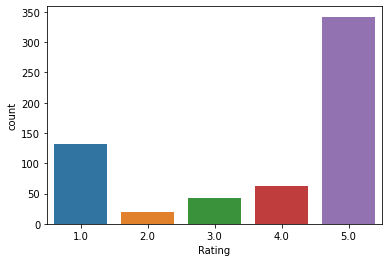

In [35]:
#Missing values in the dataset
print(f"Number of null in label : {df['Rating'].isnull().sum() }")
print(f"Number of null in label : {df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);

In [36]:
from wordcloud import WordCloud